# Semester 2 Capstone - Tree Coverage Type

## Business Case

The main stakeholder for the business case is the Bureau of Land Management. The Bureau wants to thin the forest within Roosevelt National Park to help with the health of the forest. Thinning the forest will ensure trees don't fight over resources such as light and water. The Bureau has determined that there are many Lodgepole Pine Trees within the forest and have decided the best course of action would be to cut down these specific types of trees. The lumber from these trees will also be benneficial as the Bureau will be able to sell it and make a profit. It is important to note that the Bureau does not want to cut down all the Lodgepole Pine trees and there are other types of trees within the forest and the Bureau does not want to cut down. 

I will be approching this problem using a decision tree model. 
The metrics I will be focusing on for this problem is precision, recall, accuracy, and F1. 

Because this business case is focused on cutting down only some of the Lodgepole Pine trees and not cutting down any other types of trees, I will be focusing mainly on precision to determine which is the most effective model. 

## Data Understanding

Import the libraries necesary for this model.

In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

Import the csv data file into a dataframe and examine the features of the dataframe. 

In [3]:
forest_info = pd.read_csv('covtype.csv')

In [4]:
#print out top rows examine what is in the dataframe
forest_info.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Understand what columns are in the dataset and what the columns contain.
Check for null values within the dataset and if there is any categorical data that needs to be encoded. 

In [5]:
forest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
forest_info.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


This data has 54 columns, including the target variable (Cover Type). This data will be benneficial within the frame of the business case because it has the correct target variable and multiple other relevent variables to help predict the target variable. There are also 58,1012 rows of data for each variable, which is a large enoguh size to accuratley predict coverage type using a decision tree classifier.

Each variable is releveant to the business case as each variable adresses features of the Roosevelt National Park forest. 

There are 4 wilderness area type columns and 40 soil types columns that have already been encoded from their original categorical form. 

A limitation of this dataset is that the data could have more rows and more variables to ensure the most accurate cover type prediction.

There are no null values within the data. 

The last column in the dataset is the tree Cover Type. Examine this column to better understand the the target variable. 

In [5]:
forest_info['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

The Cover Type column includes 7 different types of trees. There is a large class imbalance between the types of trees, with type 2 (Lodgepole Pine) having the most amount of records. To fix this, I am going to combine tree types 1, 3, 4, 5, 6, and 7 into one class and have the second class be tree type 2. This will create a binary classification problem where the Lodgepole Pine tree has 283,301 records while the other class will have 297,711 records, meaning there is no longer a class imbalance. 

## Data Preparation

Condense tree types 2, 3, 4, 5, 6, and 7 into a single class to fix the class imbalance and create a binary classification problem. 

In [6]:
forest_info['Cover_Type'].replace(to_replace = 1, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 3, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 7, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 6, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 5, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 4, value = 0, inplace=True)

Check the number of records within each class to ensure there is no longer a class imbalance

In [7]:
forest_info['Cover_Type'].value_counts()

0    297711
2    283301
Name: Cover_Type, dtype: int64

For clarification purposes, change type 2 tree class (Lodgepole Pine) to be represented as type 1

In [10]:
forest_info['Cover_Type'].replace(to_replace = 2, value = 1, inplace=True)

In [11]:
forest_info['Cover_Type'].value_counts()

0    297711
1    283301
Name: Cover_Type, dtype: int64

## Modeling

I am going to use a decision tree model for this classification problem

Define X features and y target variable (Cover Type) and split data into test and train sets. 

In [12]:
X = forest_info.drop('Cover_Type', axis=1)
y = forest_info['Cover_Type']

In [13]:
# create am 80/20 split for the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

Train a trimmed down precision tree that only has a max depth of 2. Plot and save a figure for this decision tree in order to create an example decision tree. We will not be using this decision tree to address the business case. 

In [19]:
pruned_DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
pruned_model = pruned_DTC.fit(X_train, y_train)
predict_y = pruned_DTC.predict(X_test)

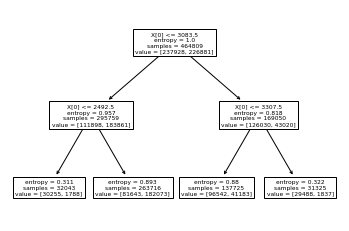

In [20]:
tree.plot_tree(pruned_model)
plt.savefig('DTC')

Now, tain a basic decision tree model using the X and y features. Do not define max depth, min samples split, or min samples leaf in this model. Use this basic model to predict y values from the X training set. 

In [140]:
DTC = DecisionTreeClassifier(criterion = 'entropy')
DTC_model1 = DTC.fit(X_train, y_train)

In [141]:
m1_predict_y = DTC_model1.predict(X_test)

Create a confusion matrix to determine the true positives, true negatives, false positives, and false negatives. 

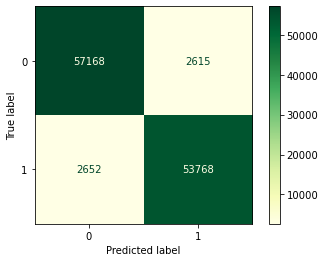

In [142]:
plot_confusion_matrix(DTC_model1, X_test, y_test, cmap='YlGn')
plt.savefig('original_cm')

The number of true positives are 53,795, true negavites are 57,139, false positives are 2,644, and false negatives are 2,625.  

Now determine the precision, recall, accruacy, and F1 of the initial model

In [144]:
m1_precision = precision_score(y_test, m1_predict_y)
print('Precision is :{0}'.format(m1_precision))
m1_recall = recall_score(y_test, m1_predict_y)
print('Recall is :{0}'.format(m1_recall))
m1_accuracy = accuracy_score(y_test, m1_predict_y)
print('Accuracy is :{0}'.format(m1_accuracy))
m1_F1 = f1_score(y_test, m1_predict_y)
print('F1 is :{0}'.format(m1_F1))

Precision is :0.9536207722185766
Recall is :0.9529953917050691
Accuracy is :0.9546741478275087
F1 is :0.9533079793977111


This original model has a small amount of false positives and false negatives, while having a large amount of true positives and negatives. The model also performs well in precision, recall, accuracy, and F1. This original model would be effective to use in addressing the business case, however I want to tune the hyperparameters to make the best model possible. 

To start tuning hyperparameters, I will create a graph for max depth, min samples split, and min samples leaf. I will use multiple values for each hyperparamter to train a decision model tree. Then I will graph the different values of the hyperparamter against the precision, recall, accuracy, and F1 of the trained decision tree. This will help me to determine what range of values would be beneficial to use in the GridSearch.

In [151]:
depth = np.arange(25,50,2)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

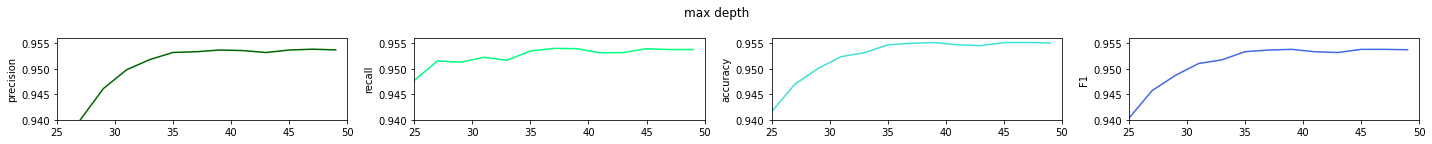

In [159]:
plt.figure(figsize = (20,2))
plt.subplot(141)
plt.plot(depth, precision, 'darkgreen')
plt.ylabel('precision')
plt.axis([25,50,0.94,0.956])
plt.subplot(142)
plt.plot(depth, recall, 'springgreen')
plt.ylabel('recall')
plt.axis([25,50,0.94,0.956])
plt.subplot(143)
plt.plot(depth, accuracy, 'turquoise')
plt.ylabel('accuracy')
plt.axis([25,50,0.94,0.956])
plt.subplot(144)
plt.plot(depth, F1, 'royalblue')
plt.ylabel('F1')
plt.axis([25,50,0.94,0.956])
plt.suptitle('max depth')
plt.tight_layout()
plt.savefig('max_depth')

In [153]:
sample_split = np.arange(2,20)
precision_sampsplit = []
recall_sampsplit = []
accuracy_sampsplit = []
F1_sampsplit = []
for n in sample_split:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DT_model.predict(X_test)
    precision_sampsplit.append(precision_score(y_test, predict_y))
    recall_sampsplit.append(recall_score(y_test, predict_y))
    accuracy_sampsplit.append(accuracy_score(y_test, predict_y))
    F1_sampsplit.append(f1_score(y_test, predict_y))

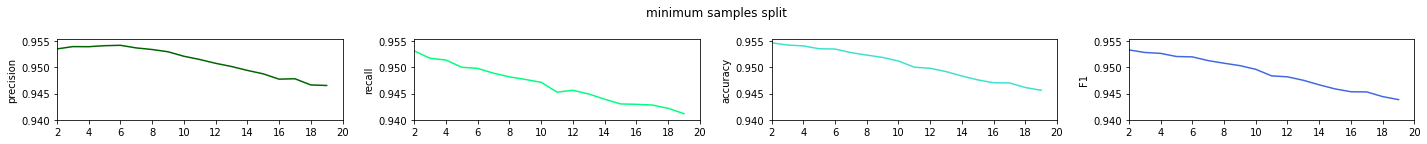

In [158]:
plt.figure(figsize = (20,2))
plt.subplot(141)
plt.plot(sample_split, precision_sampsplit, 'darkgreen')
plt.ylabel('precision')
plt.axis([2,20,0.94,0.9555])
plt.subplot(142)
plt.plot(sample_split, recall_sampsplit, 'springgreen')
plt.ylabel('recall')
plt.axis([2,20,0.94,0.9555])
plt.subplot(143)
plt.plot(sample_split, accuracy_sampsplit, 'turquoise')
plt.ylabel('accuracy')
plt.axis([2,20,0.94,0.9555])
plt.subplot(144)
plt.plot(sample_split, F1_sampsplit, 'royalblue')
plt.ylabel('F1')
plt.axis([2,20,0.94,0.9555])
plt.suptitle('minimum samples split')
plt.tight_layout()
plt.savefig('min_samples_split')

In [156]:
sample_leaf = np.arange(1,10)
precision_sampleaf = []
recall_sampleaf = []
accuracy_sampleaf = []
F1_sampleaf = []
for n in sample_leaf:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DT_model.predict(X_test)
    precision_sampleaf.append(precision_score(y_test, predict_y))
    recall_sampleaf.append(recall_score(y_test, predict_y))
    accuracy_sampleaf.append(accuracy_score(y_test, predict_y))
    F1_sampleaf.append(f1_score(y_test, predict_y))

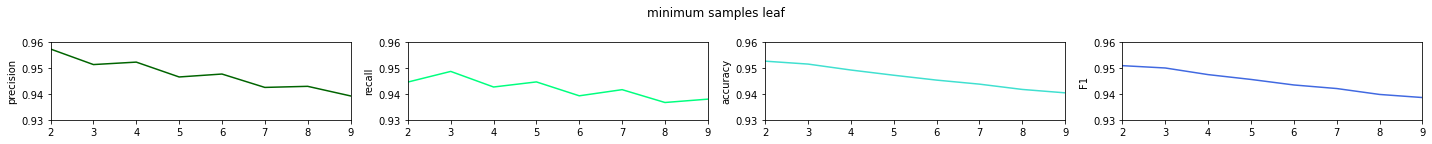

In [160]:
plt.figure(figsize = (20,2))
plt.subplot(141)
plt.plot(sample_leaf, precision_sampleaf, 'darkgreen')
plt.ylabel('precision')
plt.axis([2,9,0.93,0.96])
plt.subplot(142)
plt.plot(sample_leaf, recall_sampleaf, 'springgreen')
plt.ylabel('recall')
plt.axis([2,9,0.93,0.96])
plt.subplot(143)
plt.plot(sample_leaf, accuracy_sampleaf, 'turquoise')
plt.ylabel('accuracy')
plt.axis([2,9,0.93,0.96])
plt.subplot(144)
plt.plot(sample_leaf, F1_sampleaf, 'royalblue')
plt.ylabel('F1')
plt.axis([2,9,0.93,0.96])
plt.suptitle('minimum samples leaf')
plt.tight_layout()
plt.savefig('min_samples_leaf')

The max depth seems to have the best metric results between 30 and 40, minimum samples split and minumum samples leaf have the best results between 2 and 5. I will now use GridSearch to train decision trees and determine the optimal combination of values for the three hyperparameters. 

In [103]:
params = {'max_depth':[34,36,38,40,42,44,46],
         'min_samples_split':[2,3,4,5], 
          'min_samples_leaf':[1,2,3]}
precision = precision_score(y_test, predict_y)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, scoring = 'precision')
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [34, 36, 38, 40, 42, 44, 46],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='precision')

In [104]:
GS_results = pd.DataFrame(gridSearch.cv_results_)
GS_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.657304,0.222246,0.118865,0.030469,34,1,2,"{'max_depth': 34, 'min_samples_leaf': 1, 'min_...",0.941158,0.941679,0.942714,0.941874,0.943557,0.942196,0.000845,56
1,9.519866,0.253212,0.133647,0.020216,34,1,3,"{'max_depth': 34, 'min_samples_leaf': 1, 'min_...",0.942239,0.943747,0.945033,0.943149,0.945269,0.943887,0.001140,35
2,9.579629,0.257456,0.115183,0.011845,34,1,4,"{'max_depth': 34, 'min_samples_leaf': 1, 'min_...",0.942674,0.942197,0.943742,0.943021,0.945128,0.943352,0.001021,41
3,9.526788,0.082687,0.115977,0.011815,34,1,5,"{'max_depth': 34, 'min_samples_leaf': 1, 'min_...",0.941485,0.942311,0.944374,0.942917,0.944185,0.943054,0.001100,49
4,9.515981,0.119211,0.118877,0.013190,34,2,2,"{'max_depth': 34, 'min_samples_leaf': 2, 'min_...",0.946610,0.946824,0.948646,0.947248,0.950116,0.947889,0.001320,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,9.580378,0.105567,0.122919,0.003998,46,2,5,"{'max_depth': 46, 'min_samples_leaf': 2, 'min_...",0.946503,0.947409,0.948649,0.947416,0.950028,0.948001,0.001222,22
80,9.327115,0.180030,0.119191,0.020711,46,3,2,"{'max_depth': 46, 'min_samples_leaf': 3, 'min_...",0.939161,0.939263,0.941471,0.940898,0.941160,0.940391,0.000980,81
81,9.400070,0.142850,0.110120,0.007632,46,3,3,"{'max_depth': 46, 'min_samples_leaf': 3, 'min_...",0.939770,0.939225,0.941732,0.941089,0.941040,0.940571,0.000926,71
82,9.533595,0.044813,0.127387,0.008788,46,3,4,"{'max_depth': 46, 'min_samples_leaf': 3, 'min_...",0.939616,0.939198,0.941316,0.941824,0.941728,0.940736,0.001107,60


Sort the results of the GridSearch to determine which values to use for each hyperparamter

In [106]:
GS_results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
78,9.528765,0.181229,0.114761,0.023597,46,2,4,"{'max_depth': 46, 'min_samples_leaf': 2, 'min_...",0.947573,0.947459,0.949008,0.948414,0.949727,0.948436,0.000860,1
65,9.596012,0.222392,0.128648,0.032346,44,2,3,"{'max_depth': 44, 'min_samples_leaf': 2, 'min_...",0.947406,0.947683,0.948951,0.948236,0.949902,0.948436,0.000904,2
54,9.336751,0.123530,0.105799,0.015977,42,2,4,"{'max_depth': 42, 'min_samples_leaf': 2, 'min_...",0.947244,0.947901,0.948610,0.949148,0.949205,0.948422,0.000753,3
77,9.546455,0.195149,0.127424,0.014101,46,2,3,"{'max_depth': 46, 'min_samples_leaf': 2, 'min_...",0.947150,0.947701,0.949317,0.948108,0.949707,0.948397,0.000968,4
30,9.530850,0.173086,0.106358,0.016102,38,2,4,"{'max_depth': 38, 'min_samples_leaf': 2, 'min_...",0.947195,0.947350,0.949011,0.948140,0.950106,0.948360,0.001086,5


Based on the results of the gridsearch, max depth should be 46, min samples split should be 2 and min samples leaf should be 4. Train a decision tree model with these values.

In [117]:
updated_DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth=46, min_samples_split=2, min_samples_leaf=4)
model2 = updated_DTC.fit(X_train, y_train)

In [118]:
m2_predict_y = model2.predict(X_test)

based on the new decision tree model, create a confusion matrix.

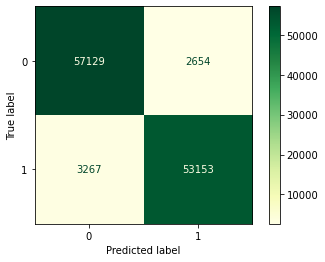

In [121]:
m2_cm = (confusion_matrix(y_test, m2_predict_y))
plot_confusion_matrix(model2, X_test, y_test, cmap='YlGn')
plt.savefig('secondary_cm')

Determine the evaluation metrics for the new decision tree model. 

In [122]:
m2_precision = precision_score(y_test, m2_predict_y)
print('Precision is :{0}'.format(m2_precision))
m2_recall = recall_score(y_test, m2_predict_y)
print('Recall is :{0}'.format(m2_recall))
m2_accuracy = accuracy_score(y_test, m2_predict_y)
print('Accuracy is :{0}'.format(m2_accuracy))
m2_F1 = f1_score(y_test, m2_predict_y)
print('F1 is :{0}'.format(m2_F1))

Precision is :0.9524432418872184
Recall is :0.9420950017724211
Accuracy is :0.9490460659363356
F1 is :0.9472408600425923


## Evaluation

The confusion matrix and evaluation metrics for the first model:

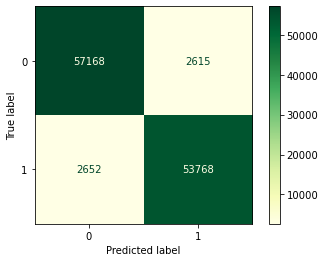

In [143]:
plot_confusion_matrix(DTC_model1, X_test, y_test, cmap='YlGn')

In [149]:
print('Precision is :{0}'.format(m1_precision*100))
print('Recall is :{0}'.format(m1_recall*100))
print('Accuracy is :{0}'.format(m1_accuracy*100))
print('F1 is :{0}'.format(m1_F1*100))

Precision is :95.36207722185766
Recall is :95.2995391705069
Accuracy is :95.46741478275086
F1 is :95.3307979397711


The confusion matrix and evaluation metrics for the second model is:

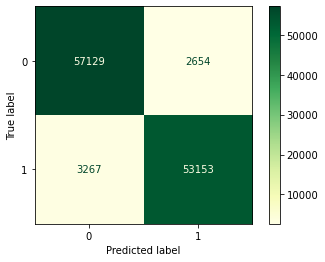

In [134]:
plot_confusion_matrix(model2, X_test, y_test, cmap='YlGn')

In [150]:
print('Precision is :{0}'.format(m2_precision*100))
print('Recall is :{0}'.format(m2_recall*100))
print('Accuracy is :{0}'.format(m2_accuracy*100))
print('F1 is :{0}'.format(m2_F1*100))

Precision is :95.24432418872183
Recall is :94.2095001772421
Accuracy is :94.90460659363356
F1 is :94.72408600425923


model 1 has 39 more true negatives and 615 more true positives than model 2. It also has 39 less false positives and 615 less false negatives than model 2. Model 1's precision is 95.36%, recall is 95.30%, accuracy is 95.47%, and F1 is 95.33%. Model 2's precision is 95.24%, recall is 94.21%, accuracy is 94.90%, and F1 is 94.72%. 

While both models perform well, model 1 performs best throughout all four metrics. 

The Bureau of Land Management should use model 1 to to predict if trees are Lodepole Pine trees within the Roosevelt National Park forest. 